In [350]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../driftpy/src/')

import pandas as pd 
import numpy as np 

pd.options.plotting.backend = "plotly"

In [351]:
luna_trades.columns

Index(['id', 'programId', 'recordId', 'userAuthority', 'user',
       'baseAssetAmount', 'quoteAssetAmount', 'markPriceBefore',
       'markPriceAfter', 'fee', 'referrerReward', 'refereeDiscount',
       'tokenDiscount', 'liquidation', 'direction', 'blockchainTimestamp',
       'serverTimestamp', 'marketIndex', 'historyIndex', 'oraclePrice',
       'quoteAssetAmountSurplus'],
      dtype='object')

In [352]:
# luna_trades = pd.read_csv('/Users/zanes/Downloads/5.csv')
# (luna_trades[['oraclePrice', 'markPriceAfter']]/1e10).tail(100000).plot()

In [353]:
# !pwd

In [354]:
# (luna_trades.groupby('blockchainTimestamp')['oraclePrice'].last()/1e10).tail(50000).to_csv('lunaCrash/oracle.csv')

In [355]:
experiment = 'lunaCrash'

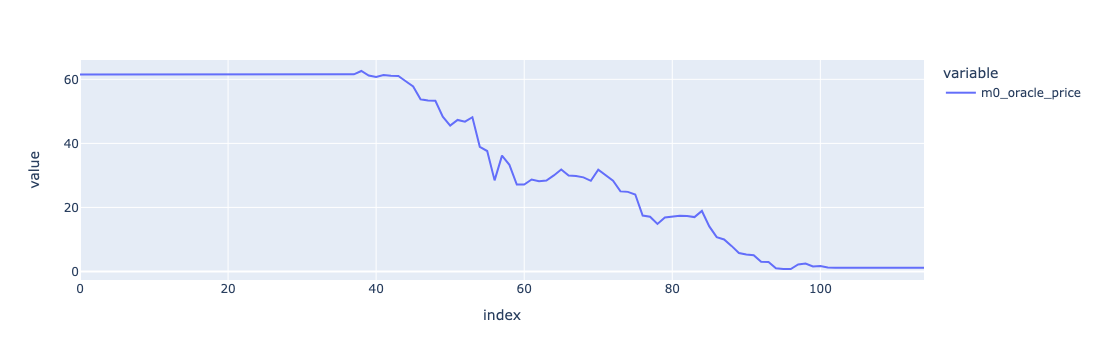

In [356]:
df = pd.read_csv(experiment+'/chs.csv')
df.columns
df['m0_oracle_price'].plot()

In [357]:
trial_guard = pd.read_csv('leverage10x/trial_oracle_guards/result_market0.csv')

In [358]:
result = pd.read_csv('leverage10x/trial_no_oracle_guards/result_market0.csv')
print(result.shape)

(90, 102)


In [359]:
str(result.columns.tolist())

"['pubkey', 'amm', 'pnl_pool', 'expiry_price', 'number_of_users', 'imf_factor', 'unrealized_pnl_imf_factor', 'unrealized_pnl_max_imbalance', 'liquidator_fee', 'if_liquidation_fee', 'insurance_claim', 'expiry_ts', 'next_fill_record_id', 'next_funding_rate_record_id', 'next_curve_record_id', 'margin_ratio_initial', 'margin_ratio_maintenance', 'unrealized_pnl_initial_asset_weight', 'unrealized_pnl_maintenance_asset_weight', 'market_index', 'status', 'contract_type', 'contract_tier', 'oracle', 'historical_oracle_data', 'market_position_per_lp', 'fee_pool', 'last_oracle_normalised_price', 'last_oracle_reserve_price_spread_pct', 'base_asset_reserve', 'quote_asset_reserve', 'concentration_coef', 'min_base_asset_reserve', 'max_base_asset_reserve', 'sqrt_k', 'peg_multiplier', 'terminal_quote_asset_reserve', 'base_asset_amount_long', 'base_asset_amount_short', 'base_asset_amount_with_amm', 'base_asset_amount_with_unsettled_lp', 'quote_asset_amount_long', 'quote_asset_amount_short', 'quote_entry_

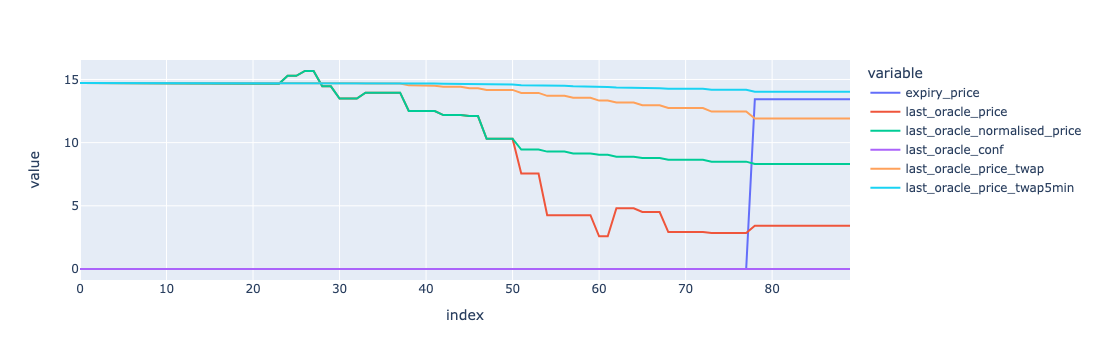

In [360]:
(result[['expiry_price', 
         'last_oracle_price',
         'last_oracle_normalised_price',
         'last_oracle_conf',
         'last_oracle_price_twap',
         'last_oracle_price_twap5min',
        ]]/1e6).plot()

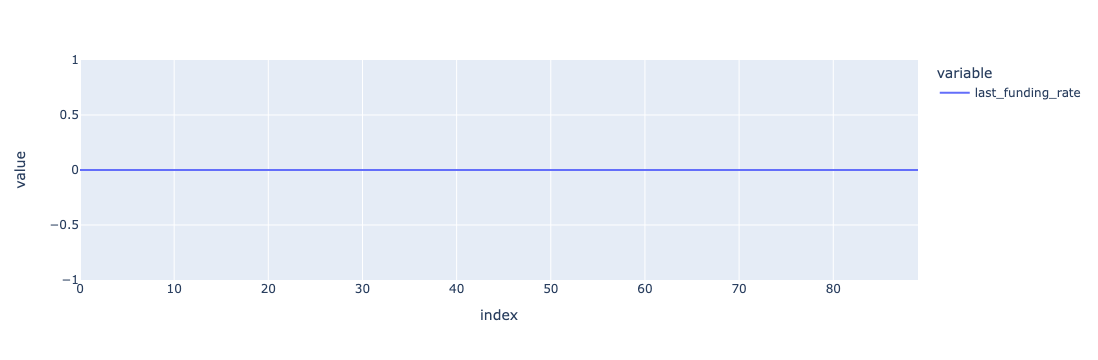

In [311]:
result['last_funding_rate'].plot()

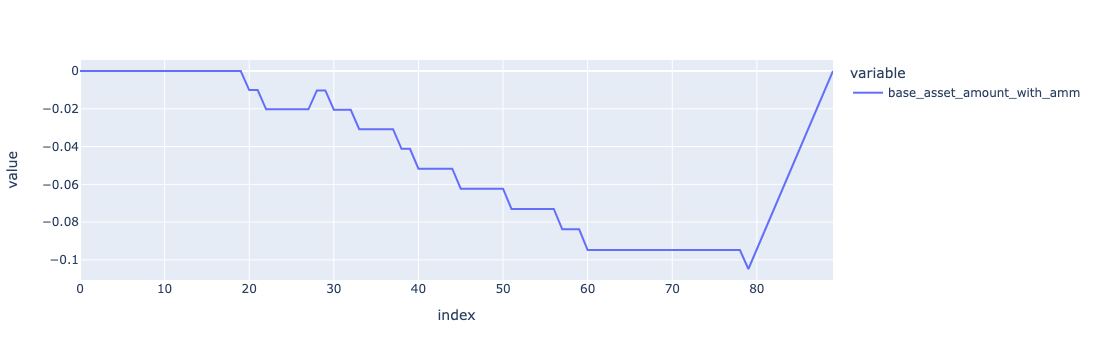

In [312]:
(result.base_asset_amount_with_amm/1e9).plot()

In [313]:
result.funding_period

0     60
1     60
2     60
3     60
4     60
      ..
85    60
86    60
87    60
88    60
89    60
Name: funding_period, Length: 90, dtype: int64

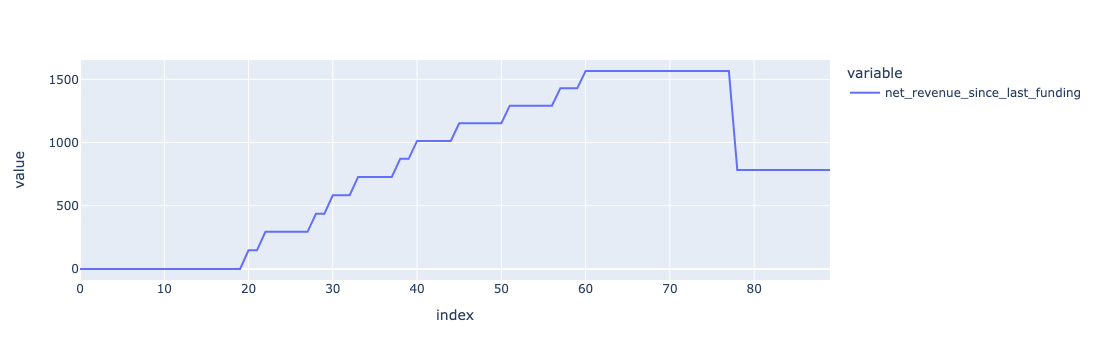

In [314]:
result.net_revenue_since_last_funding.plot()

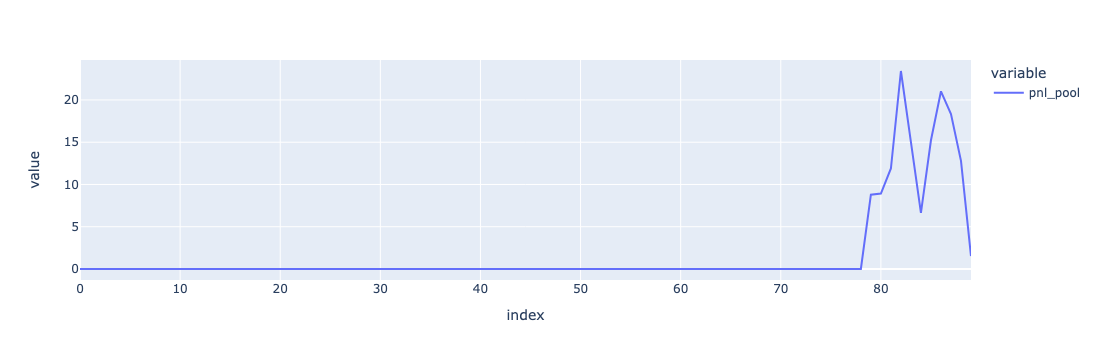

In [315]:
(result.pnl_pool.apply(lambda x: x.split('balance=')[-1].split(',')[0]).astype(float)/1e6).plot()

read user


In [362]:
user_levloss = pd.read_csv('lunaCrash/trial_no_oracle_guards/result_user_8r4QwZKAXUyYen4JMqEPf1N7J3hBuucx6m7XYfc6G5R7.csv')

In [374]:
user_levloss.perp_positions.values[0]

'PerpPosition(last_cumulative_funding_rate=0, base_asset_amount=0, quote_asset_amount=0, quote_entry_amount=0, open_bids=0, open_asks=0, settled_pnl=0, lp_shares=0, last_net_base_asset_amount_per_lp=0, last_net_quote_asset_amount_per_lp=0, remainder_base_asset_amount=0, market_index=0, open_orders=0, padding=ListContainer([0]))'

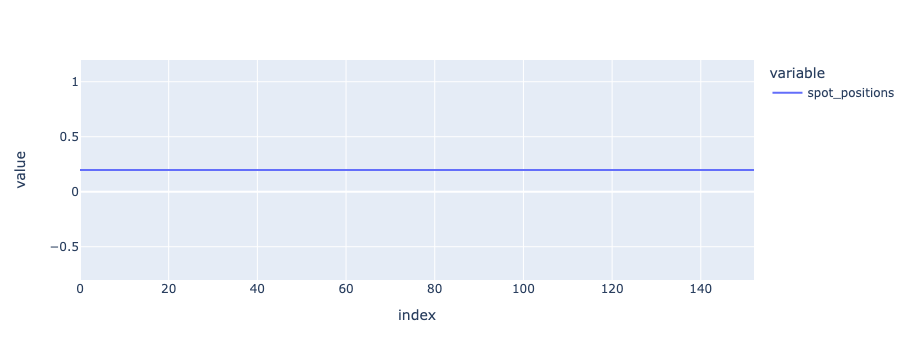

In [371]:
def get_field(ser, field):
    return ser.apply(lambda x: x.split(field+'=')[-1].split(',')[0]).astype(float)


(get_field(user_levloss.spot_positions, 'scaled_balance')/1e9).plot()

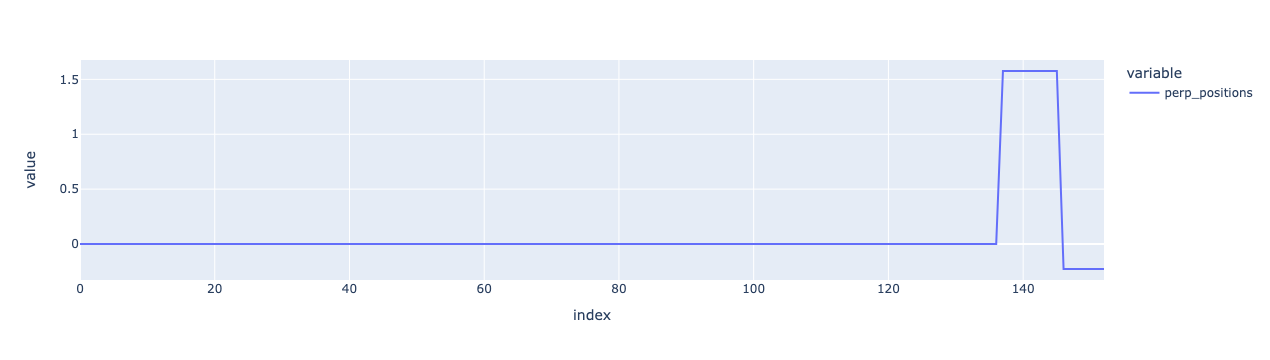

In [382]:
(get_field(user_levloss.perp_positions, 'quote_asset_amount')/1e6).plot()